In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import quspin
import os

In [2]:
np.set_printoptions(suppress=True,precision=3)
from quspin.basis import spin_basis_1d
from quspin.operators import hamiltonian

In [3]:
def XXZHamiltonian(L,M,J_zz,J_ch): #returns hamiltonian in the standard basis
    basis = spin_basis_1d(L=L,Nup = M)
    op_list_xy = [[1/4,i,i+1]for i in range(0,L-1)]#integrable terms of the Hamiltonian
    op_list_zz = [[J_zz/4,i,i+1]for i in range(0,L-1)]

    if J_ch == 0:
        static = [["xx",op_list_xy],["yy",op_list_xy],["zz",op_list_zz]]

        H_XXZ = hamiltonian(static,[],basis = basis)
        return H_XXZ
    else:
        op_list_xy_NNN = [[J_ch/4,i,i+2]for i in range(0,L-2)]

        static = [["xx",op_list_xy],["yy",op_list_xy],["zz",op_list_zz],["xx",op_list_xy_NNN],["yy",op_list_xy_NNN]]

        H_XXZ_NNN = hamiltonian(static,[],basis = basis)
        return H_XXZ_NNN

In [4]:
def split_list(list):
    middle = int(len(list)/2)
    return list[:middle],list[middle:]

def get_level_spacings(eigenvalues):
    shift = np.array([0])
    shifted = np.concatenate((shift,eigenvalues[:len(eigenvalues)-1]),axis = 0)#get all the values shifted by 1
    spacings = eigenvalues - shifted
    return spacings[1:]

def partition_normalise(eigenvalues,percent_removed,max_length):#removes the first and last n% values and partitions the list
    
    eigenvalues = np.sort(eigenvalues)

    num = len(eigenvalues)
    lower = round(percent_removed*num)#discard the lowest and highest 5%
    upper = num-lower
    eigenvalues = eigenvalues[lower:upper]

    eigen_list = [eigenvalues]
    #print(eigen_list)
    while len(eigen_list[0])>=max_length:
        new_eigen_list = []
        for list in eigen_list:
            half_1, half_2 = split_list(list)
            new_eigen_list.append(np.array(half_1))
            new_eigen_list.append(np.array(half_2))
        eigen_list = new_eigen_list
    
    for i in range(len(eigen_list)):
        spacings_i = get_level_spacings(eigen_list[i])
        average = np.average(spacings_i)
        eigen_list[i]/=average    

    return eigen_list#returns a list of partitions of eigenvalues normalised for the average spacing of each list to be 1


In [5]:
H_in = XXZHamiltonian(13,7,0.5,0)
H_ch = XXZHamiltonian(13,7,0.5,1.0)

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


In [6]:
int_eigenvalues = H_in.eigvalsh()
ch_eigenvalues = H_ch.eigvalsh()
len(int_eigenvalues)

1716

In [7]:
int_eigenvalues,int_eigenvectors = H_in.eigh()
ch_eigenvalues,ch_eigenvectors = H_ch.eigh()

In [ ]:

np.savetxt("ieigvalL13M7.csv",int_eigenvalues.real, delimiter=',')
np.savetxt("ieigvecL13M7.csv",int_eigenvectors.real, delimiter=',')
np.savetxt("cheigvalL13M7.csv",ch_eigenvalues.real, delimiter=',')
np.savetxt("cheigvecL13M7.csv",ch_eigenvectors.real, delimiter=',')



In [ ]:
import time
tol=10**(-6)
ueigenvecs=[]
ueigenvals=[]
3

time1=time.time()

for i, e in enumerate(int_eigenvectors.real):
    e1=e
    e.tolist().reverse()
    for k in range(len(e)):
        if e[k]*e1[k]>tol:
            ueigenvecs.append(e)
            ueigenvals.append(int_eigenvalues[i])
            break
        elif e[k]*e1[k] <tol:
            break

print(time.time()-time1)
print(len(int_eigenvectors.real)-len(ueigenvecs))


0.07372069358825684
435


In [9]:
import time
tol=10**(-6)
ueigenvecs=[]
ueigenvals=[]

time1=time.time()

for i, e in enumerate(int_eigenvectors.real):
    e1=e
    np.array(e.tolist().reverse())
    if e.dot(e1)>tol:
            ueigenvecs.append(e)
            ueigenvals.append(int_eigenvalues[i])

print(time.time()-time1)
print(len(int_eigenvectors.real)-len(ueigenvecs))

0.09805560111999512
0


bruh time

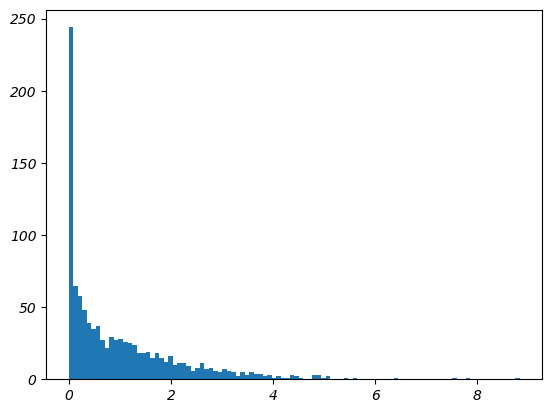

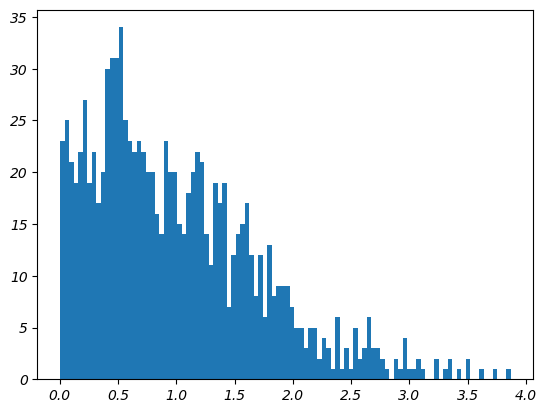

In [10]:
normalised_eigenvals_int = partition_normalise(int_eigenvalues,0.2,20000)
normalised_eigenvals_ch = partition_normalise(ch_eigenvalues,0.2,20000)

plt.hist(get_level_spacings(normalised_eigenvals_int[0]),bins = 100);
fig,ax = plt.subplots()
ax.hist(get_level_spacings(normalised_eigenvals_ch[0]),bins = 100);


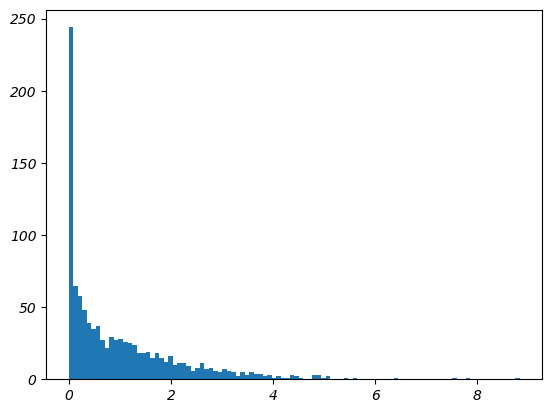

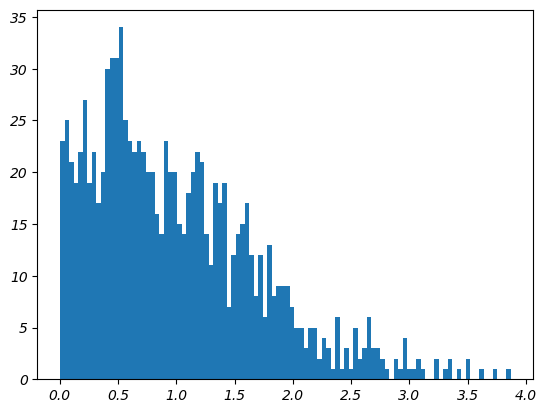

In [11]:
normalised_eigenvals_int = partition_normalise(ueigenvals,0.2,20000)
normalised_eigenvals_ch = partition_normalise(ch_eigenvalues,0.2,20000)

plt.hist(get_level_spacings(normalised_eigenvals_int[0]),bins = 100);
fig,ax = plt.subplots()
ax.hist(get_level_spacings(normalised_eigenvals_ch[0]),bins = 100);

In [ ]:
    for i in range(len(partitioned_eigenvalues)):
        spacings_i = get_level_spacings(partitioned_eigenvalues[i])
        average = np.average(spacings_i)
        partitioned_eigenvalues[i]/=average
    
    normalised_int_eigenvals = []
    for list1 in partitioned_eigenvalues:
        for item in list1:
            normalised_int_eigenvals.append(item)

-Parity operator stuff

find eigenvector parity

keep the positive or negative parity ones only


-Ratios

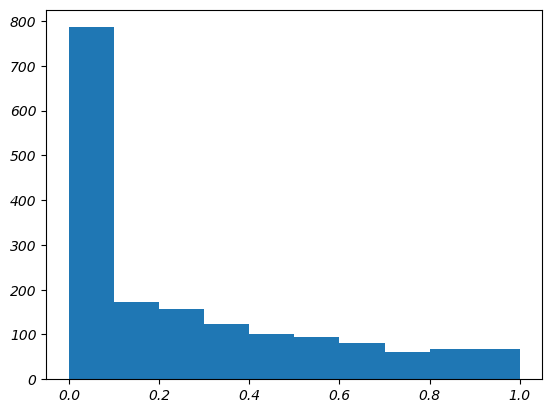

(array([246., 226., 202., 187., 173., 163., 142., 144., 125., 106.]),
 array([0.001, 0.101, 0.201, 0.3  , 0.4  , 0.5  , 0.6  , 0.7  , 0.799,
        0.899, 0.999]),
 <BarContainer object of 10 artists>)

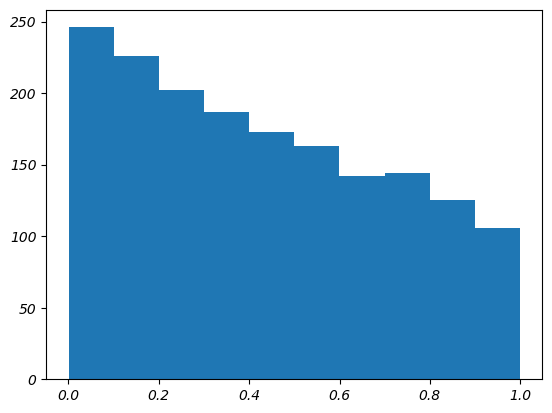

In [28]:
s_in = get_level_spacings(int_eigenvalues)
s_ch = get_level_spacings(ch_eigenvalues)

r_in =[]# ratio of consecutive level spacings
for i in range(len(s_in)-1):
    r_in.append((min(s_in[i-1], s_in[i]))/(max(s_in[i-1], s_in[i])))
plt.hist(r_in)
plt.show()

r_ch =[]# ratio of consecutive level spacings
for i in range(len(s_ch)-1):
    r_ch.append((min(s_ch[i-1], s_ch[i]))/(max(s_ch[i-1], s_ch[i])))
plt.hist(r_ch)

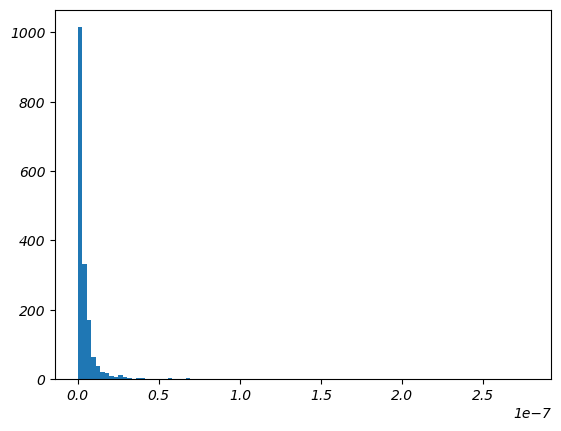

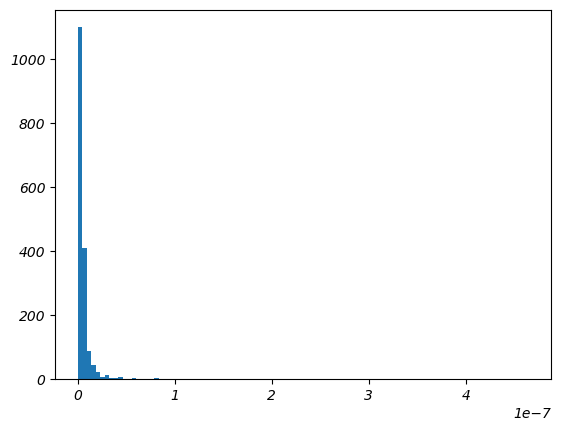

In [29]:
r_IN = []
for i in range(len(s_in)-1):
    r_IN.append((s_in[i-1])/(s_in[i]+1*10**6))
plt.hist(r_IN, bins = 100)
plt.show()

r_CH = []
for i in range(len(s_ch)-1):
    r_CH.append((s_ch[i-1])/(s_ch[i]+1*10**6))
plt.hist(r_CH, bins = 100)
plt.show()